# Let's See How Many Trees there are in the Forests

This notebook shows a subplot for each (dataset, forestType, variant) triple where

- dataset $\in$ {adult, wine-quality}
- forestType $\in$ {ET, RF}
- variant $\in$ {WithLeafEdges, NoLeafEdges}.

Each subplot shows a the number of frequent subtrees found or the maximum size of any such frequent subtree as a function of the frequency threshold in the forest database.

Here, a tree is frequent if it occurs as an undirected subgraph in at least threshold many decision trees in the random forest.
Hence, the numbers shown here are upper bounds on the numbers we are actually interested in, where we include the roots of the decision trees in our considerations.


### Input Data

These are the relevant lines producing the data processed in this notebook:

    echo "processing threshold ${threshold} for ${f}"
    ./lwg -e subtree -m bfs -t ${threshold} -p 10
    -o forests/undirectedFrequentTrees/${dataset}/${variant}/`basename ${f} .graph`_t${threshold}.patterns 
    < ${f}
    > forests/undirectedFrequentTrees/${dataset}/${variant}/`basename ${f} .graph`_t${threshold}.features
    2> forests/undirectedFrequentTrees/${dataset}/${variant}/`basename ${f} .graph`_t${threshold}.logs


In [34]:
import os
import matplotlib.pyplot as pl
import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)

## Plot Number of Frequent Subtrees

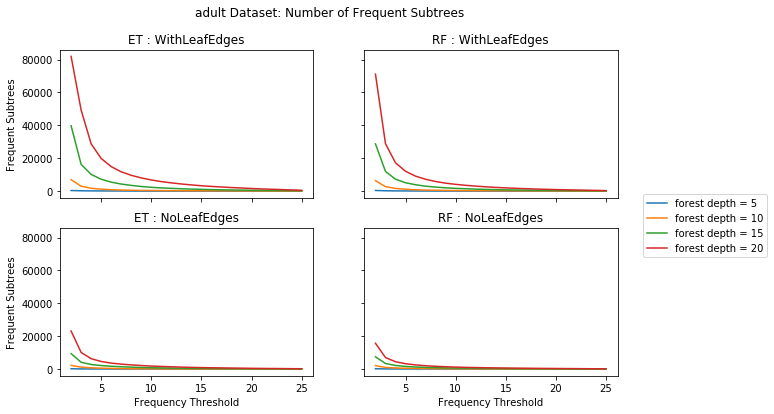

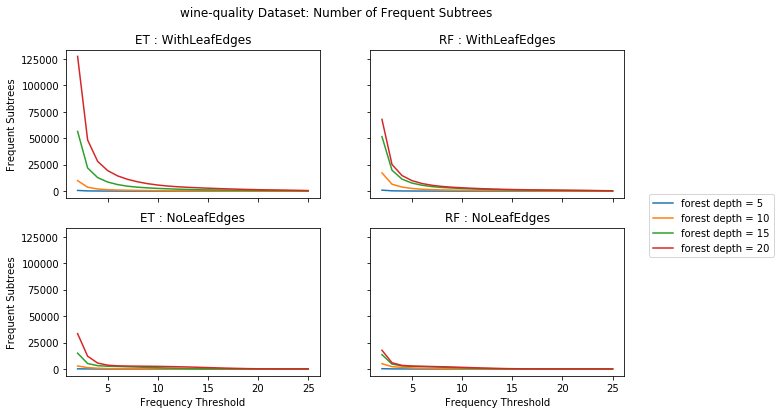

In [47]:
# plot number of frequent subtrees
for dataset in ['adult', 'wine-quality']:
    fig, axes = pl.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
    fig.suptitle(dataset + ' Dataset: Number of Frequent Subtrees')
    x = -1
    y = -1
    for variant in ['WithLeafEdges', 'NoLeafEdges']:
        x = (x + 1) % 2        
        for forestType in ['ET', 'RF']:
            y = (y + 1) % 2
            subplot = axes[x][y]
            for depth in ['5', '10', '15', '20']:
                values = list()
                for threshold in range(2, 26):
                    filename = os.path.join('forests', 'undirectedFrequentTrees', dataset, variant, 
                                            forestType + '_' + depth + '_t' + str(threshold) + '.patterns')
                    # count number of patterns (i.e., lines in the pattern file)
                    try:
                        f = open(filename)
                        value = sum(1 for line in f)
                        f.close()
                    except:
                        value = -1
                    values.append(value)
                        
                # plot it    
                subplot.plot(range(2, 26), values, label='forest depth = ' + str(depth))
                subplot.set_title(forestType + ' : ' + variant)
            
            if x == 1:
                subplot.set_xlabel('Frequency Threshold')
            if y == 0:
                subplot.set_ylabel('Frequent Subtrees')
    
    # colors are identical in all subplots due to same order of depth enumeration. Hence, this works:
    subplot.legend(loc=(1.1, 0.8))
    pl.show()            

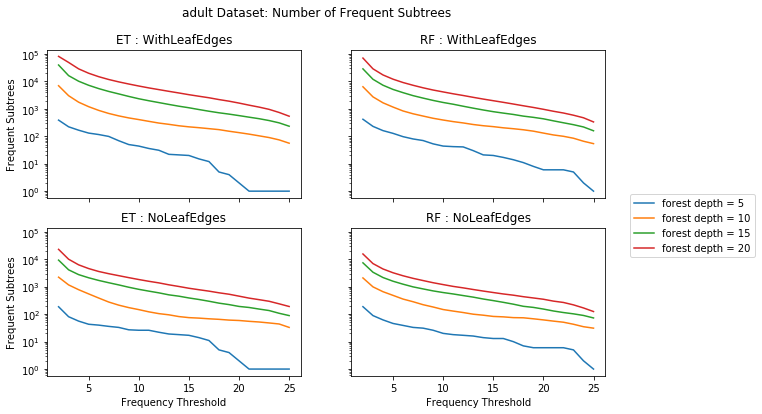

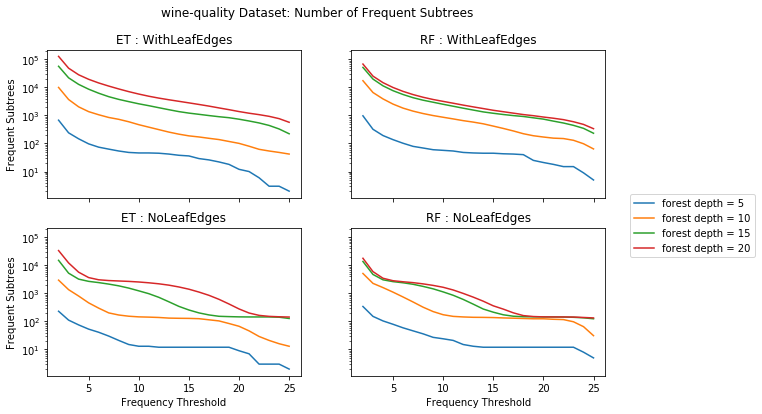

In [46]:
# plot number of frequent subtrees with log scale on yaxis
for dataset in ['adult', 'wine-quality']:
    fig, axes = pl.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
    fig.suptitle(dataset + ' Dataset: Number of Frequent Subtrees')
    x = -1
    y = -1
    for variant in ['WithLeafEdges', 'NoLeafEdges']:
        x = (x + 1) % 2        
        for forestType in ['ET', 'RF']:
            y = (y + 1) % 2
            subplot = axes[x][y]
            for depth in ['5', '10', '15', '20']:
                values = list()
                for threshold in range(2, 26):
                    filename = os.path.join('forests', 'undirectedFrequentTrees', dataset, variant, 
                                            forestType + '_' + depth + '_t' + str(threshold) + '.patterns')
                    # count number of patterns (i.e., lines in the pattern file)
                    try:
                        f = open(filename)
                        value = sum(1 for line in f)
                        f.close()
                    except:
                        value = -1
                    values.append(value)
                        
                # plot it    
                subplot.plot(range(2, 26), values, label='forest depth = ' + str(depth))
                subplot.set_title(forestType + ' : ' + variant)
                subplot.set_yscale('log')
            
            if x == 1:
                subplot.set_xlabel('Frequency Threshold')
            if y == 0:
                subplot.set_ylabel('Frequent Subtrees')
    
    # colors are identical in all subplots due to same order of depth enumeration. Hence, this works:
    subplot.legend(loc=(1.1, 0.8))
    pl.show()  

## Plot Maximum Pattern Size

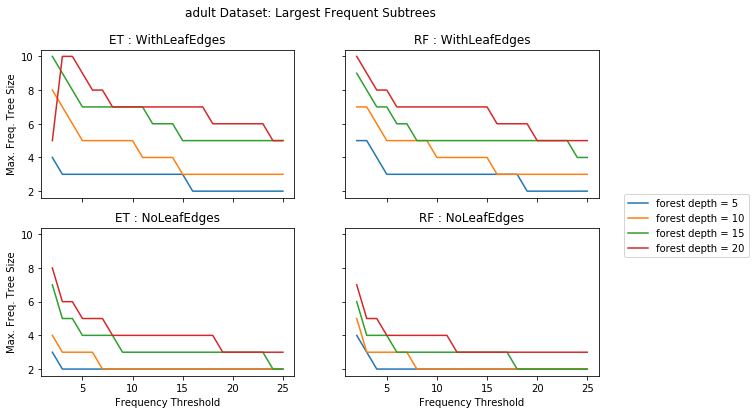

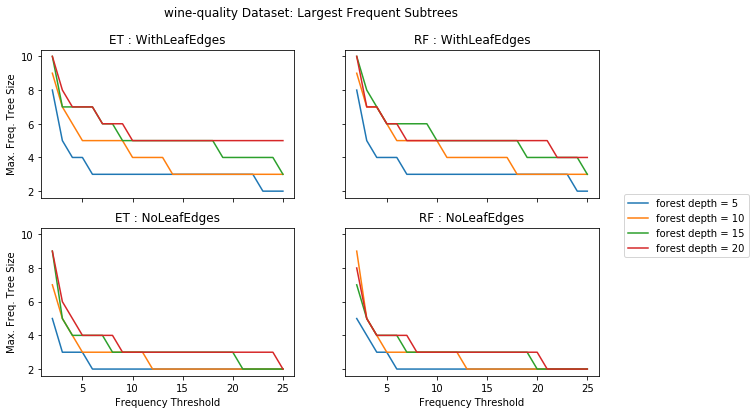

In [45]:
# plot number of vertices in largest frequent subtree
for dataset in ['adult', 'wine-quality']:
    fig, axes = pl.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
    fig.suptitle(dataset + ' Dataset: Largest Frequent Subtrees')
    x = -1
    y = -1
    for variant in ['WithLeafEdges', 'NoLeafEdges']:
        x = (x + 1) % 2        
        for forestType in ['ET', 'RF']:
            y = (y + 1) % 2
            subplot = axes[x][y]
            for depth in ['5', '10', '15', '20']:
                values = list()
                for threshold in range(2, 26):
                    filename = os.path.join('forests', 'undirectedFrequentTrees', dataset, variant, 
                                            forestType + '_' + depth + '_t' + str(threshold) + '.logs')
                    # parse log file
                    try:
                        f = open(filename)
                        value = 0

                        for line in f:
                            if line.startswith('Number of frequent vertices: '):
                                if (int(line.split(': ')[1]) > 0):
                                    value = 1
                            if line.startswith('Number of frequent edges: '):
                                if (int(line.split(': ')[1]) > 0):
                                    value = 2
                            if line.startswith('Processing patterns with '):
                                value = int(line.split(' ')[3])
                                fpFound = False
                            if line.startswith('frequent patterns: '):
                                if (int(line.split(': ')[1]) > 0):
                                    fpFound = True
                        # the log file contains information about the last level of patterns:
                        # either the algorithm stopped due to the max pattern size parameter
                        # or due to no frequent trees on that level.
                        # in the first case, the max pattern size is the last number parsed in the third if
                        # in the second case, the max pattern size is the last number parsed in the third if minus 1 
                        if (value > 2) and not fpFound:
                            value -= 1
                        f.close()
                    except:
                        print('Parsing error at ' + filename)
                        value = -1
                    values.append(value)
                        
                # plot it    
                subplot.plot(range(2, 26), values, label='forest depth = ' + str(depth))
                subplot.set_title(forestType + ' : ' + variant)
            
            if x == 1:
                subplot.set_xlabel('Frequency Threshold')
            if y == 0:
                subplot.set_ylabel('Max. Freq. Tree Size')
    
    # colors are identical in all subplots due to same order of depth enumeration. Hence, this works:
    subplot.legend(loc=(1.1, 0.8))
    pl.show()  

## Preliminary Interpretation

- As was to be expected, the number of frequent trees and the maximum sizes of the frequent trees are larger in the variant where we include the leaf nodes of the decision trees.
- In the variant with leaf edges there are -- for both datasets -- trees on five vertices that are contained in at least 17 of the 25 decision trees in the random forests.
- For large ETs and RFs (depth 15 and 20) there seem to be more large subtrees for ET than for RF. (more precisely: the Max. Freq. Tree Size tends to drop faster with the threshold for RF than for ET)

- Note that the experiment ET : WithLeafEdges for frequency threshold 2 and forest depth 20 got killed by my system while working on frequent trees of size 6 (vertices). Hence, the strange spike.